In [1]:
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.feature_extraction import DictVectorizer
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

np.set_printoptions(threshold=np.nan)

%matplotlib inline

def remove_categorical_columns(df):
    df.drop('MSZoning',axis=1,inplace=True)
    df.drop('Street',axis=1,inplace=True)
    df.drop('Alley',axis=1,inplace=True)
    df.drop('LotShape',axis=1,inplace=True)
    df.drop('LandContour',axis=1,inplace=True)
    df.drop('Utilities',axis=1,inplace=True)
    df.drop('LotConfig',axis=1,inplace=True)
    df.drop('LandSlope',axis=1,inplace=True)
    df.drop('Neighborhood',axis=1,inplace=True)
    df.drop('Condition1',axis=1,inplace=True)
    df.drop('Condition2',axis=1,inplace=True)
    df.drop('BldgType',axis=1,inplace=True)
    df.drop('HouseStyle',axis=1,inplace=True)
    df.drop('RoofStyle',axis=1,inplace=True)
    df.drop('RoofMatl',axis=1,inplace=True)
    df.drop('Exterior1st',axis=1,inplace=True)
    df.drop('Exterior2nd',axis=1,inplace=True)
    df.drop('MasVnrType',axis=1,inplace=True)
    df.drop('ExterQual',axis=1,inplace=True)
    df.drop('ExterCond',axis=1,inplace=True)
    df.drop('Foundation',axis=1,inplace=True)
    df.drop('BsmtQual',axis=1,inplace=True)
    df.drop('BsmtCond',axis=1,inplace=True)
    df.drop('BsmtExposure',axis=1,inplace=True)
    df.drop('BsmtFinType1',axis=1,inplace=True)
    df.drop('BsmtFinType2',axis=1,inplace=True)
    df.drop('Heating',axis=1,inplace=True)
    df.drop('HeatingQC',axis=1,inplace=True)
    df.drop('CentralAir',axis=1,inplace=True)
    df.drop('Electrical',axis=1,inplace=True)
    df.drop('KitchenQual',axis=1,inplace=True)
    df.drop('Functional',axis=1,inplace=True)
    df.drop('FireplaceQu',axis=1,inplace=True)
    df.drop('GarageType',axis=1,inplace=True)
    df.drop('GarageFinish',axis=1,inplace=True)
    df.drop('GarageQual',axis=1,inplace=True)
    df.drop('GarageCond',axis=1,inplace=True)
    df.drop('PavedDrive',axis=1,inplace=True)
    df.drop('PoolQC',axis=1,inplace=True)
    df.drop('Fence',axis=1,inplace=True)
    df.drop('MiscFeature',axis=1,inplace=True)
    df.drop('SaleType',axis=1,inplace=True)
    df.drop('SaleCondition',axis=1,inplace=True)

def input_missing_value(df):
    
    
    #LotFrontage - insert the mean 
    imp = Imputer(missing_values='NaN', strategy='mean', axis=1)
    #print(np.shape(df['LotFrontage']))
    df['LotFrontage'] = imp.fit_transform(df['LotFrontage']).transpose()    
   
    #Alley
    df.Alley.fillna(inplace=True,value='No')

    #MasVnrType - remove the records where the value is NA
    #print("Number of lines where MasVnrType has Nan value", len(df[df['MasVnrType'].isnull()]))
    #df.dropna(axis=0,subset=['MasVnrType'],inplace=True)
    #print("Number of lines where MasVnrType has Nan value",len(df[df['MasVnrType'].isnull()]))
    df.drop('MasVnrType',axis=1,inplace=True)
    
    #MasVnrArea - remove the hole column
    df.drop('MasVnrArea',axis=1,inplace=True)
    
    #Condition2 - remove the hole column Possui quantidade de tipos diferentes na base de treino e teste e apenas 
    #um dos tipos é relevante    
    df.drop('Condition2',axis=1,inplace=True)
    
    #RoofMatl - remove the hole column Possui quantidade de tipos diferentes na base de treino e teste e apenas 
    #um dos tipos é relevante    
    df.drop('RoofMatl',axis=1,inplace=True)
    

    #MSZoning   - tem NA apenas na base de teste. Como nao posso remover linhas removo a coluna   
    #df.dropna(axis=0,subset=['MSZoning'],inplace=True)
    df.drop('MSZoning',axis=1,inplace=True)
    
    #BsmtQual
    df.BsmtQual.fillna(inplace=True,value='No')
    
    #HouseStyle - Esse valor so existe na base de treino. Ao inves de remover toda coluna removo somente as linhas 
    df.drop(df[df.HouseStyle=='2.5Fin'].index,inplace=True)
    
    #BsmtCond
    df.BsmtCond.fillna(inplace=True,value='No')

    #BsmtExposure
    df.BsmtExposure.fillna(inplace=True,value='No')

    #BsmtFinType1
    df.BsmtFinType1.fillna(inplace=True,value='No')

    #BsmtFinType2
    df.BsmtFinType2.fillna(inplace=True,value='No')

    #Electrical - remove the records where the value is NA
    #print("Number of lines where Electrical has Nan value",len(df[df['Electrical'].isnull()]))
    df.dropna(axis=0,subset=['Electrical'],inplace=True) # apenas no treino 
    df.drop(df[df.Electrical=='Mix'].index,inplace=True) # apenas no treino
    #print("Number of lines where Electrical has Nan value",len(df[df['Electrical'].isnull()]))

    #FireplaceQu
    df.FireplaceQu.fillna(inplace=True,value='No')
    

    #GarageType
    df.GarageType.fillna(inplace=True,value='No')

    #GarageYrBlt - remove the hole column
    df.drop('GarageYrBlt',axis=1,inplace=True)

    #GarageFinish
    df.GarageFinish.fillna(inplace=True,value='No')

    #GarageQual - A base de teste nao tem um dos tipos presente na base de treino. Assim a base de treino terá uma 
    #feature para esse tipo e a de teste não. Alem disso, apenas um tipo é pertinente
    #Achei melhor entao excluir essa coluna    
    df.drop('GarageQual',axis=1,inplace=True)
    #df.drop(df[df.GarageQual=='Ex'].index,inplace=True)
    
    #GarageCond
    df.GarageCond.fillna(inplace=True,value='No')

    #PoolQC
    #df.PoolQC.fillna(inplace=True,value='No')
    df.drop('PoolQC',axis=1,inplace=True)
    
    #Fence
    df.Fence.fillna(inplace=True,value='No')

    #MiscFeature
    #df.MiscFeature.fillna(inplace=True,value='No')
    df.drop('MiscFeature',axis=1,inplace=True)

    #MiscVal
    df.drop('MiscVal',axis=1,inplace=True)
    
    #SaleType
    df.drop('SaleType',axis=1,inplace=True)
    
    #Exterior1st- nao posso remover linhas do teste
    #df.dropna(axis=0,subset=['Exterior1st'],inplace=True)     
    #df.drop(df[df.Exterior1st=='Stone'].index,inplace=True)
    #df.drop(df[df.Exterior1st=='ImStucc'].index,inplace=True)
    #df.drop(df[df.Exterior1st=='CBlock'].index,inplace=True)
    df.drop('Exterior1st',axis=1,inplace=True)
    
    #Exterior2nd
    #df.dropna(axis=0,subset=['Exterior2nd'],inplace=True)
    #df.Exterior2nd.fillna(inplace=True,value= 'Other')
    #df.drop(df[df.Exterior2nd=='Other'].index,inplace=True)
    #df.drop(df[df.Exterior2nd=='CBlock'].index,inplace=True)
    df.drop('Exterior2nd',axis=1,inplace=True)
    
    #Heating -- esses tipos existem apenas na base de treino
    df.drop(df[df.Heating=='OthW'].index,inplace=True)
    df.drop(df[df.Heating=='Floor'].index,inplace=True)
    
    #KitchenQual
    #df.dropna(axis=0,subset=['KitchenQual'],inplace=True)
    df.KitchenQual.fillna(inplace=True,value='Fa') #- Apenas a base de teste tem NA e como nao posso remover registro
    #dessa base setei o valor menos comum
    
    #Functional
    #df.dropna(axis=0,subset=['Functional'],inplace=True)
    df.drop('Functional',axis=1,inplace=True)
    
    #Utilities
    df.drop('Utilities',axis=1,inplace=True)
    
    #BsmtFinSF1
    #df.dropna(axis=0,subset=['BsmtFinSF1'],inplace=True)
    df['BsmtFinSF1'] = imp.fit_transform(df['BsmtFinSF1']).transpose()    
    
    #BsmtFinSF2
    #df.dropna(axis=0,subset=['BsmtFinSF2'],inplace=True)
    df['BsmtFinSF2'] = imp.fit_transform(df['BsmtFinSF2']).transpose()    
    
    #BsmtUnfSF
    #df.dropna(axis=0,subset=['BsmtUnfSF'],inplace=True)
    df.drop('BsmtUnfSF',axis=1,inplace=True)
    
    #TotalBsmtSF
    #df.dropna(axis=0,subset=['TotalBsmtSF'],inplace=True)
    df['TotalBsmtSF'] = imp.fit_transform(df['TotalBsmtSF']).transpose()    
    
    #BsmtFullBath - apenas na base de teste tem NA.Nao posso remover a linha
    df.BsmtFullBath.fillna(inplace=True,value='0')
    
    #BsmtHalfBath- apenas na base de teste tem NA.Nao posso remover a linha
    df.BsmtHalfBath.fillna(inplace=True,value='0')
    
    #GarageCars
    #df.dropna(axis=0,subset=['GarageCars'],inplace=True)
    df.GarageCars.fillna(value='0',inplace=True)
    
    #GarageArea
    #df.dropna(axis=0,subset=['GarageArea'],inplace=True)
    df.GarageArea.fillna(value='0',inplace=True)
    
df = pd.read_csv("train.csv",na_values=['?','NA'],delimiter=',',delim_whitespace=False)
df_test = pd.read_csv("test.csv",na_values=['?','NA'],delimiter=',',delim_whitespace=False)

print(df.shape)
print(df_test.shape)
#print(df.head())
#print(df.describe())
print(df.dtypes)
#df = df.dropna()




from sklearn.preprocessing import Imputer

########################Dealing with missing values

#missing data
# total = df.isnull().sum().sort_values(ascending=False)
# percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
# missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
# print(missing_data.head(20))

# 
#               Total   Percent
# PoolQC         1453  0.995205
# MiscFeature    1406  0.963014
# Alley          1369  0.937671
# Fence          1179  0.807534
# FireplaceQu     690  0.472603
# LotFrontage     259  0.177397
# GarageCond       81  0.055479
# GarageType       81  0.055479
# GarageYrBlt      81  0.055479
# GarageFinish     81  0.055479
# GarageQual       81  0.055479
# BsmtExposure     38  0.026027
# BsmtFinType2     38  0.026027
# BsmtFinType1     37  0.025342
# BsmtCond         37  0.025342
# BsmtQual         37  0.025342
# MasVnrArea        8  0.005479
# MasVnrType        8  0.005479
# Electrical        1  0.000685
# Utilities         0  0.000000



#print(df.columns[df.isnull().any()])
#'LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
#       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
#       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
#       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
#       'MiscFeature'
input_missing_value(df)


#print(df_test.columns[df_test.isnull().any()])
#Index(['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st',
#       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
#       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
#      'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath',
#       'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu',
#      'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
#       'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature',
#       'SaleType'],

input_missing_value(df_test)

#Valores numericos que continham NA sao detectados como String. Assim, depois que removemos o NA temos que setar corretamente 
#o tipo 
df_test.BsmtFullBath = df_test.BsmtFullBath.astype("int64")
df_test.BsmtHalfBath = df_test.BsmtHalfBath.astype("int64")
df_test.GarageCars = df_test.GarageCars.astype("int64")
df_test.GarageArea = df_test.GarageArea.astype("int64")

print(df.shape)
print(df_test.shape)

########################End dealing with missing values


# The OneHotEncoder converts features represented as numeric codes (so they are values that can't be ordered) to their binary representation
#enc = preprocessing.OneHotEncoder() 
#aux = enc.fit_transform(data_train)


########################Tratando campos nominais

vec = DictVectorizer()
aux = np.asmatrix(vec.fit_transform(df.transpose().to_dict().values()).toarray())

data_train = pd.DataFrame(aux,columns=vec.feature_names_)
#data_train = pd.get_dummies(df)


data_train.to_csv('train_no_categorical.csv')

print("New shape train:" , np.shape(data_train))
print("Indice da coluna SalePrice no novo dataset" , data_train.columns.get_loc('SalePrice'))

################################################# Base de teste

vec = DictVectorizer()
aux_test = vec.fit_transform(df_test.transpose().to_dict().values()).toarray()
data_test = pd.DataFrame(aux_test,columns=vec.feature_names_)
#data_test = pd.get_dummies(df_test)
 
print("New shape test:" , np.shape(data_test))

data_test.to_csv('test_no_categorical.csv')


print("Colunas que existem apenas teste : " , data_test.columns.difference(data_train.columns))


(1460, 81)
(1459, 80)
Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
Gar

count      1447.000000
mean     180944.330339
std       79185.190380
min       34900.000000
25%      130000.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


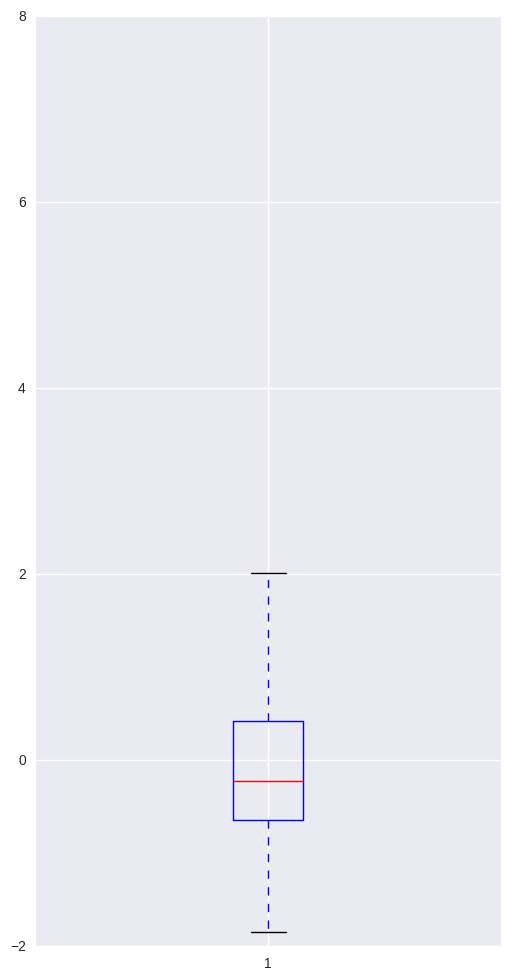

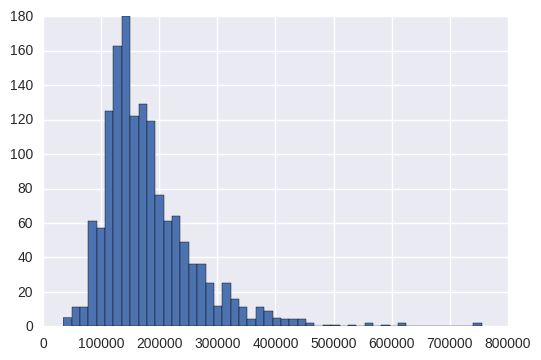

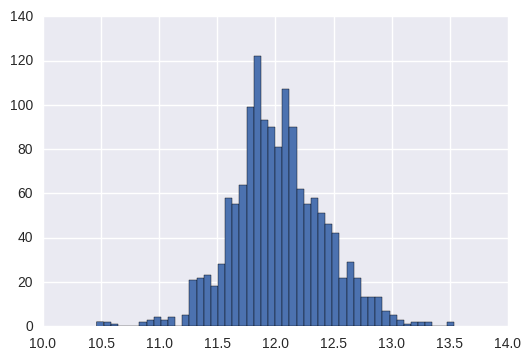

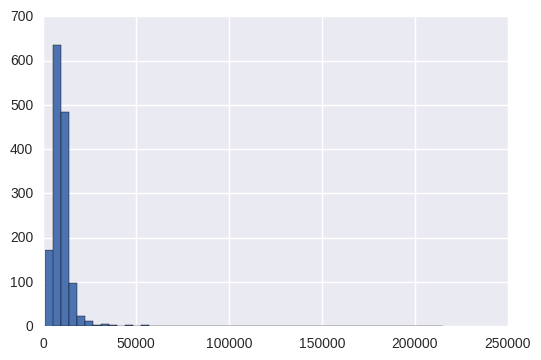

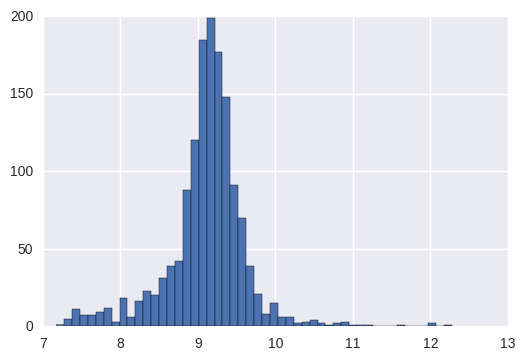

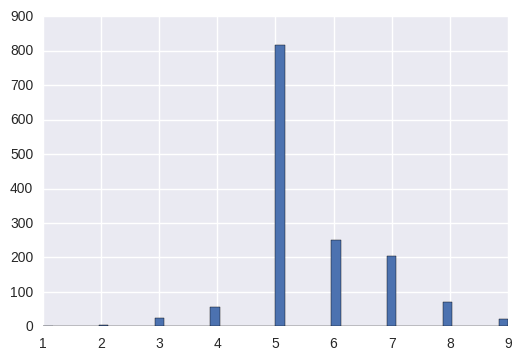

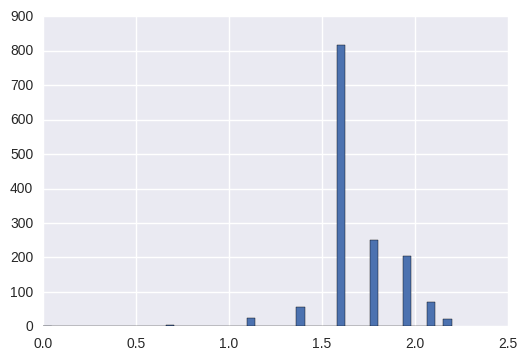

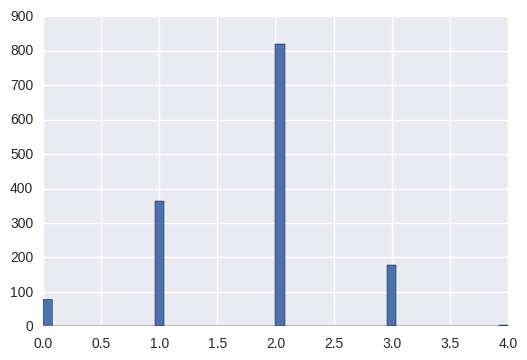

In [2]:
from scipy.stats import norm
from scipy import stats


print(data_train.SalePrice.describe())

saleprice_scaled = preprocessing.StandardScaler().fit_transform((data_train['SalePrice'][:,np.newaxis]));
fig = plt.figure(1, figsize=(6, 12))
#ax = fig.add_subplot(111)
#ax.boxplot(saleprice_scaled)
plt.boxplot(saleprice_scaled)

plt.figure()
x = plt.hist(data_train['SalePrice'],bins=50)

plt.figure()
saleprice_log = np.log(data_train['SalePrice'])
x = plt.hist(saleprice_log,bins=50)



plt.figure()
x = plt.hist(data_train['LotArea'],bins=50)

plt.figure()
saleprice_log = np.log(data_train['LotArea'])
x = plt.hist(saleprice_log,bins=50)



plt.figure()
x = plt.hist(data_train['OverallCond'],bins=50)

plt.figure()
saleprice_log = np.log(data_train['OverallCond'])
x = plt.hist(saleprice_log,bins=50)



plt.figure()
x = plt.hist(data_train['GarageCars'],bins=50)

# plt.figure()
# saleprice_log = np.log(data_train['GarageArea'])
# x = plt.hist(saleprice_log,bins=50)


#data_train['SalePrice'] = np.log(data_train['SalePrice'])
data_train['OverallQual'] = np.log(data_train['OverallQual'])
data_train['LotArea'] = np.log(data_train['LotArea'])


data_test['OverallQual'] = np.log(data_test['OverallQual'])
data_test['LotArea'] = np.log(data_test['LotArea'])



In [3]:
# Encode text values to dummy variables(i.e. [1,0,0],[0,1,0],[0,0,1] for red,green,blue)
def encode_text_dummy(df,name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = "{}-{}".format(name,x)
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)
    





In [4]:
print("\n Tentativa de selecionar melhores features \n")

from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.feature_selection import SelectFromModel


#Removing features with low variance
#print("Original shape: {}".format(np.shape(df.iloc[:,0:-1])))
#sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
#features = sel.fit_transform(df.iloc[:,0:-1])
#print("Shape apos Removing features with low variance {}".format(np.shape(features))) #nenhuma foi selecionada 
#print("\n")

#Tree-based feature selection
y_train = (data_train['SalePrice'])
x_train = (data_train.drop('SalePrice',axis=1))

clf = ExtraTreesRegressor()
clf = clf.fit(x_train,y_train)
data = np.zeros((1,x_train.shape[1])) 
data = pd.DataFrame(data, columns=x_train.columns)
data.iloc[0] = clf.feature_importances_
data = data.T.sort_values(df.index[0], ascending=False).T


print("As features selecionadas com Tree-based feature selection foram: \n")
yyy = np.asarray((data.columns[0:25]))
xxx = np.asarray((data.iloc[:,0:25]))
print(yyy)
print(xxx)

model = SelectFromModel(clf, prefit=True)
aux = model.transform(x_train)

print("\n New shape train apos Tree-based feature selection: {}".format(aux.shape))

print("\n Fim tentativa selecionar melhores features \n")


data_train_less_features = pd.concat([pd.DataFrame(aux),pd.DataFrame(y_train)],axis=1)
data_train_less_features.to_csv('data_train_less_features.csv')


aux = model.transform((data_test))
data_test_less_features = pd.DataFrame(aux)
print("\n New shape test apos Tree-based feature selection: {}".format(aux.shape))
data_test_less_features.to_csv('data_test_less_features.csv')


from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn   import metrics
from sklearn.model_selection import train_test_split


 Tentativa de selecionar melhores features 

As features selecionadas com Tree-based feature selection foram: 

['ExterQual=TA' 'OverallQual' 'GarageCars' 'BsmtQual=Ex' 'GrLivArea'
 'Neighborhood=NoRidge' '2ndFlrSF' 'FireplaceQu=No' '1stFlrSF' 'FullBath'
 'LotArea' 'TotRmsAbvGrd' 'BsmtFinSF1' 'TotalBsmtSF' 'YearRemodAdd'
 'YearBuilt' 'KitchenQual=Ex' 'BsmtFullBath' 'BedroomAbvGr' 'BsmtQual=Gd'
 'Fireplaces' 'BsmtExposure=Gd' 'GarageArea' 'GarageType=Detchd'
 'ExterQual=Fa']
[[ 0.2109427   0.17957346  0.17353545  0.0594645   0.05247104  0.02009321
   0.01980831  0.01878523  0.01718969  0.01424184  0.01397076  0.01390908
   0.01102361  0.01047376  0.00829399  0.00779148  0.00688355  0.00674868
   0.00573221  0.00532687  0.00512012  0.00508982  0.00472362  0.00376826
   0.00358516]]

 New shape train apos Tree-based feature selection: (1447, 22)

 Fim tentativa selecionar melhores features 


 New shape test apos Tree-based feature selection: (1459, 22)


In [5]:
#Starting making predictors

from sklearn.linear_model import LinearRegression, SGDRegressor

#Caso 1 - Linear Regression 
print("Caso 1 - Linear Regression ")

# Shuffle
np.random.seed(42)
data_train = data_train.reindex(np.random.permutation(data_train.index))
data_train.reset_index(inplace=True, drop=True)


#Normalization
y_train = ((data_train['SalePrice']))
x_train = (data_train.drop('SalePrice',axis=1))
scaler = preprocessing.StandardScaler().fit((x_train))
x_train_scaled = scaler.transform((x_train))


classifier = LinearRegression()
kf = KFold(5, random_state=7)    
oos_y = []
oos_pred = []
fold = 0
pred = []

for training, test in kf.split(x_train_scaled):
    fold+=1
    print("Fold #{}".format(fold))
        
    x_train_fold = x_train_scaled[training]
    y_train_fold = y_train[training]
    x_test_fold = x_train_scaled[test]
    y_test_fold = y_train[test]
    
    classifier.fit(x_train_fold, y_train_fold)
    pred = classifier.predict(x_test_fold)
    oos_y.append(y_test_fold)
    oos_pred.append(pred)        

    # Measure accuracy    
    score = np.sqrt(metrics.mean_squared_error(y_test_fold,pred))
    print("Fold score (RMSE): %.2f" %(score))

    # Evaluate success using accuracy
    print("Accuracy: %.3f" % classifier.score(X=x_test_fold,y=y_test_fold))

# Build the oos prediction list and calculate the error.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
score = np.sqrt(metrics.mean_squared_error(oos_y,oos_pred))
print("\n Average RMSE: {}".format(score))    

# The mean squared error
#pred = classifier.predict(x_test_scaled)
#score = metrics.mean_squared_error(y_test, pred)
#print("Final, out of sample score (RMSE): {}".format(score))    

# Evaluate success using accuracy
#print("Final Accuracy: %.3f" % classifier.score(X=x_test_scaled,y=y_test))



print("\n\n")
print("SGDRegressor \n\n")

classifier = SGDRegressor()

kf = KFold(5, random_state=7)    
oos_y = []
oos_pred = []
fold = 0
pred = []
for training, test in kf.split(x_train_scaled):
    fold+=1
    print("Fold #{}".format(fold))
        
    x_train_fold = x_train_scaled[training]
    y_train_fold = y_train[training]
    x_test_fold = x_train_scaled[test]
    y_test_fold = y_train[test]
    
    classifier.fit(x_train_fold, y_train_fold)
    pred = classifier.predict(x_test_fold)
    oos_y.append(y_test_fold)
    oos_pred.append(pred)        

    # Measure accuracy    
    score = np.sqrt(metrics.mean_squared_error(y_test_fold,pred))
    print("Fold score (RMSE): %.2f" %(score))

    # Evaluate success using accuracy
    print("Accuracy: %.3f" % classifier.score(X=x_test_fold,y=y_test_fold))

# Build the oos prediction list and calculate the error.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
score = np.sqrt(metrics.mean_squared_error(oos_y,oos_pred))
print("\n Average RMSE: {}".format(score))    

###########Less features

print("\n\n Less Features")
#Normalization
y_train = ((data_train_less_features['SalePrice']))
x_train = (data_train_less_features.drop('SalePrice',axis=1))
scaler = preprocessing.StandardScaler().fit((x_train))
x_train = scaler.transform((x_train))


classifierLinearRegression = LinearRegression()
kf = KFold(5, random_state=7)    
oos_y = []
oos_pred = []
fold = 0
pred = []

for training, test in kf.split(x_train):
    fold+=1
    print("Fold #{}".format(fold))
    pred = []    
    x_train_fold = x_train[training]
    y_train_fold = y_train[training]
    x_test_fold = x_train[test]
    y_test_fold = y_train[test]
    
    classifierLinearRegression = classifierLinearRegression.fit(x_train_fold, y_train_fold)
    pred = classifierLinearRegression.predict(x_test_fold)
    oos_y.append(y_test_fold)
    oos_pred.append(pred)        

    # Measure accuracy    
    score = np.sqrt(metrics.mean_squared_error(y_test_fold,pred))
    print("Fold score (RMSE): %.2f" %(score))

    # Evaluate success using accuracy
    print("Accuracy: %.3f" % classifierLinearRegression.score(X=x_test_fold,y=y_test_fold))

  
# Build the oos prediction list and calculate the error.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
score = np.sqrt(metrics.mean_squared_error(oos_y,oos_pred))
print("\n Average RMSE: {}".format(score))    

# Write the cross-validated prediction
pred = []
pred = np.array(pred,dtype='int64')
pred = classifierLinearRegression.predict(scaler.transform(data_test_less_features))
result = pd.DataFrame(pred,columns=['SalePrice'], index=range(1461,2920))
result.to_csv('pred_LinearRegression.csv', columns=['SalePrice'])




print("\n\n")
print("SGDRegressor \n\n")

classifier = SGDRegressor()

kf = KFold(5, random_state=7)    
oos_y = []
oos_pred = []
fold = 0
pred = []
for training, test in kf.split(x_train):
    fold+=1
    print("Fold #{}".format(fold))
        
    x_train_fold = x_train[training]
    y_train_fold = y_train[training]
    x_test_fold = x_train[test]
    y_test_fold = y_train[test]
    
    classifier.fit(x_train_fold, y_train_fold)
    pred = classifier.predict(x_test_fold)
    oos_y.append(y_test_fold)
    oos_pred.append(pred)        

    # Measure accuracy    
    score = np.sqrt(metrics.mean_squared_error(y_test_fold,pred))
    print("Fold score (RMSE): %.2f" %(score))

    # Evaluate success using accuracy
    print("Accuracy: %.3f" % classifier.score(X=x_test_fold,y=y_test_fold))

# Build the oos prediction list and calculate the error.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
score = np.sqrt(metrics.mean_squared_error(oos_y,oos_pred))
print("\n Average RMSE: {}".format(score))    


Caso 1 - Linear Regression 
Fold #1
Fold score (RMSE): 62253302579843872.00
Accuracy: -543004708495252411908096.000
Fold #2
Fold score (RMSE): 71977998905361208.00
Accuracy: -1026353898264376469618688.000
Fold #3
Fold score (RMSE): 27777507664402568.00
Accuracy: -168967119000157235970048.000
Fold #4
Fold score (RMSE): 56226.64
Accuracy: 0.490
Fold #5
Fold score (RMSE): 32893.35
Accuracy: 0.870

 Average RMSE: 4.437478000826501e+16



SGDRegressor 


Fold #1
Fold score (RMSE): 41694.75
Accuracy: 0.756
Fold #2
Fold score (RMSE): 35083.54
Accuracy: 0.756
Fold #3
Fold score (RMSE): 29884.00
Accuracy: 0.804
Fold #4
Fold score (RMSE): 114897.43
Accuracy: -1.130
Fold #5
Fold score (RMSE): 37777.34
Accuracy: 0.828

 Average RMSE: 60787.516289254825


 Less Features
Fold #1
Fold score (RMSE): 25158.85
Accuracy: 0.880
Fold #2
Fold score (RMSE): 34363.74
Accuracy: 0.819
Fold #3
Fold score (RMSE): 34826.64
Accuracy: 0.840
Fold #4
Fold score (RMSE): 26767.15
Accuracy: 0.861
Fold #5
Fold score (RMSE

In [6]:
#Caso 3 - SVM
from sklearn.svm import SVR
from sklearn.svm import NuSVR

print("SVM")

# Shuffle
np.random.seed(42)
data_train = data_train.reindex(np.random.permutation(data_train.index))
data_train.reset_index(inplace=True, drop=True)

#Normalization
y_train = ((data_train['SalePrice']))
x_train = (data_train.drop('SalePrice',axis=1))
scaler = preprocessing.StandardScaler().fit((x_train))
x_train = scaler.transform((x_train))
x_train = np.ascontiguousarray(x_train)


classifier = NuSVR(kernel='linear', C=1e3) #34761.27693615821
kf = KFold(5)    
oos_y = []
oos_pred = []
fold = 0

for training, test in kf.split(x_train):
    fold+=1
    print("Fold #{}".format(fold))
        
    x_train_fold = x_train[training]
    y_train_fold = y_train[training]
    x_test_fold = x_train[test]
    y_test_fold = y_train[test]
    
    classifier.fit(x_train_fold, y_train_fold)
    pred = classifier.predict(x_test_fold)
    oos_y.append(y_test_fold)
    oos_pred.append(pred)        

    # Measure accuracy    
    score = np.sqrt(metrics.mean_squared_error(y_test_fold,pred))
    print("Fold score (RMSE): %.2f" %(score))

    # Evaluate success using accuracy
    print("Accuracy: %.3f" % classifier.score(X=x_test_fold,y=y_test_fold))

# Build the oos prediction list and calculate the error.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
score = np.sqrt(metrics.mean_squared_error(oos_y,oos_pred))
print("\n Average RMSE: {}".format(score))    


# The mean squared error
#pred = classifier.predict(x_test_scaled)
#score = metrics.mean_squared_error(y_test, pred)
#print("Final, out of sample score (RMSE): {}".format(score))    

# Evaluate success using accuracy
#print("Final Accuracy: %.3f" % classifier.score(X=x_test_scaled,y=y_test))

###########Less features
print("\n\n Less features \n")
#Normalization
y_train = ((data_train_less_features['SalePrice']))
x_train = (data_train_less_features.drop('SalePrice',axis=1))
scaler = preprocessing.StandardScaler().fit((x_train))
x_train = scaler.transform((x_train))
x_train = np.ascontiguousarray(x_train)


#classifier = SVR(kernel='rbf', C=1e3, gamma=0.1) #66483.84692815947
classifierSVR = SVR(kernel='linear', C=1e3) #34761.27693615821
#classifier = SVR(kernel='poly', C=1e3, degree=3) #86747.4465877091
#classifier = NuSVR(C=1e3) #57249.1589623674

kf = KFold(5, random_state=7)    
oos_y = []
oos_pred = []
fold = 0

for training, test in kf.split(x_train):
    fold+=1
    print("Fold #{}".format(fold))
        
    x_train_fold = x_train[training]
    y_train_fold = y_train[training]
    x_test_fold = x_train[test]
    y_test_fold = y_train[test]
    
    classifierSVR = classifierSVR.fit(x_train_fold, y_train_fold)
    pred = classifierSVR.predict(x_test_fold)
    oos_y.append(y_test_fold)
    oos_pred.append(pred)        

    # Measure accuracy    
    score = np.sqrt(metrics.mean_squared_error(y_test_fold,pred))
    print("Fold score (RMSE): %.2f" %(score))

    # Evaluate success using accuracy
    print("Accuracy: %.3f" % classifierSVR.score(X=x_test_fold,y=y_test_fold))

    

# Build the oos prediction list and calculate the error.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
score = np.sqrt(metrics.mean_squared_error(oos_y,oos_pred))
print("\n Average RMSE: {}".format(score))    

# Write the cross-validated prediction
pred = []
pred = np.array(pred,dtype='int64')
pred = classifierSVR.predict(scaler.transform(data_test_less_features))

result = pd.DataFrame(pred,columns=['SalePrice'], index=range(1461,2920))


result.to_csv('pred_SVR.csv', columns=['SalePrice'])



SVM
Fold #1
Fold score (RMSE): 31177.62
Accuracy: 0.811
Fold #2
Fold score (RMSE): 26305.13
Accuracy: 0.898
Fold #3
Fold score (RMSE): 23479.12
Accuracy: 0.914
Fold #4
Fold score (RMSE): 44333.00
Accuracy: 0.729
Fold #5
Fold score (RMSE): 23965.41
Accuracy: 0.897

 Average RMSE: 30835.713767034016


 Less features 

Fold #1
Fold score (RMSE): 24702.88
Accuracy: 0.884
Fold #2
Fold score (RMSE): 33717.98
Accuracy: 0.826
Fold #3
Fold score (RMSE): 34744.06
Accuracy: 0.841
Fold #4
Fold score (RMSE): 25918.86
Accuracy: 0.869
Fold #5
Fold score (RMSE): 43705.10
Accuracy: 0.716

 Average RMSE: 33270.38405163398
[ 208449.76637923  182304.21534567  219308.72529602  173459.95253809
  292066.84579751  178393.91871007  283194.6264928   218120.2667879
  166014.85037334  125568.64960643  133469.0074913   349697.78629321
  128178.4839224   214129.54463517  160309.53350624  125455.96848156
  154645.75353327  111505.34905564  167222.58258458  130469.52388314
  300032.40063072  113388.76862141  229065.0

In [7]:
from sklearn.neural_network import MLPRegressor

# Shuffle
print("NN MLPRegressor")
np.random.seed(42)
data_train = data_train.reindex(np.random.permutation(data_train.index))
data_train.reset_index(inplace=True, drop=True)


#Normalization
y_train = ((data_train['SalePrice']))
x_train = (data_train.drop('SalePrice',axis=1))
scaler = preprocessing.StandardScaler().fit((x_train))
x_train_scaled = scaler.transform((x_train))


classifier = MLPRegressor(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(10,4,2), random_state=1)
kf = KFold(5)    
oos_y = []
oos_pred = []
fold = 0

for training, test in kf.split(x_train_scaled):
    fold+=1
    print("Fold #{}".format(fold))
        
    x_train_fold = x_train_scaled[training]
    y_train_fold = y_train[training]
    x_test_fold = x_train_scaled[test]
    y_test_fold = y_train[test]
    
    classifier.fit(x_train_fold, y_train_fold)
    pred = classifier.predict(x_test_fold)
    oos_y.append(y_test_fold)
    oos_pred.append(pred)        

    # Measure accuracy    
    score = np.sqrt(metrics.mean_squared_error(y_test_fold,pred))
    print("Fold score (RMSE): %.2f" %(score))

    # Evaluate success using accuracy
    print("Accuracy: %.3f" % classifier.score(X=x_test_fold,y=y_test_fold))

# Build the oos prediction list and calculate the error.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
score = np.sqrt(metrics.mean_squared_error(oos_y,oos_pred))
print("\n Average RMSE: {}".format(score))    

# The mean squared error
#pred = classifier.predict(x_test_scaled)
#score = metrics.mean_squared_error(y_test, pred)
#print("Final, out of sample score (RMSE): {}".format(score))    

# Evaluate success using accuracy
#print("Final Accuracy: %.3f" % classifier.score(X=x_test_scaled,y=y_test))

###########Less features
print("\n\n")
#Normalization
y_train = ((data_train_less_features['SalePrice']))
x_train = (data_train_less_features.drop('SalePrice',axis=1))
scaler = preprocessing.StandardScaler().fit((x_train))
x_train_scaled = scaler.transform((x_train))


classifier = MLPRegressor(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(8,2), random_state=1)
kf = KFold(5, random_state=7)    
oos_y = []
oos_pred = []
fold = 0

for training, test in kf.split(x_train_scaled):
    fold+=1
    print("Fold #{}".format(fold))
        
    x_train_fold = x_train_scaled[training]
    y_train_fold = y_train[training]
    x_test_fold = x_train_scaled[test]
    y_test_fold = y_train[test]
    
    classifier.fit(x_train_fold, y_train_fold)
    pred = classifier.predict(x_test_fold)
    oos_y.append(y_test_fold)
    oos_pred.append(pred)        

    # Measure accuracy    
    score = np.sqrt(metrics.mean_squared_error(y_test_fold,pred))
    print("Fold score (RMSE): %.2f" %(score))

    # Evaluate success using accuracy
    print("Accuracy: %.3f" % classifier.score(X=x_test_fold,y=y_test_fold))

# Build the oos prediction list and calculate the error.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
score = np.sqrt(metrics.mean_squared_error(oos_y,oos_pred))
print("\n Average RMSE: {}".format(score))    


NN MLPRegressor
Fold #1
Fold score (RMSE): 47213.99
Accuracy: 0.589
Fold #2
Fold score (RMSE): 36339.70
Accuracy: 0.767
Fold #3
Fold score (RMSE): 49069.11
Accuracy: 0.628
Fold #4
Fold score (RMSE): 34704.13
Accuracy: 0.786
Fold #5
Fold score (RMSE): 40556.62
Accuracy: 0.795

 Average RMSE: 41968.60937920695



Fold #1
Fold score (RMSE): 27506.91
Accuracy: 0.856
Fold #2
Fold score (RMSE): 37350.21
Accuracy: 0.786
Fold #3
Fold score (RMSE): 32046.37
Accuracy: 0.865
Fold #4
Fold score (RMSE): 27620.99
Accuracy: 0.852
Fold #5
Fold score (RMSE): 50932.77
Accuracy: 0.614

 Average RMSE: 36149.97967679728


In [8]:
##Random Forests
from sklearn.ensemble import RandomForestRegressor

# Shuffle
print("Random Forests")
np.random.seed(42)
data_train = data_train.reindex(np.random.permutation(data_train.index))
data_train.reset_index(inplace=True, drop=True)

# Split into train/test
x_train, x_test, y_train, y_test = train_test_split(data_train.drop('SalePrice',axis=1), data_train['SalePrice'], 
                                                    test_size=0.20, random_state=42)

classifier = RandomForestRegressor(n_estimators=20,oob_score=True)

classifier.fit(x_train, y_train)

# The mean squared error
pred = classifier.predict(x_test)
score = np.sqrt(metrics.mean_squared_error(y_test, pred))
print("Mean squared error: {}".format(score))
# Evaluate success using accuracy
print("Accuracy: %.3f" % classifier.score(X=x_test,y=y_test))
print("\n\n")


y_train = ((data_train['SalePrice']))
x_train = (data_train.drop('SalePrice',axis=1))


classifier = RandomForestRegressor(n_estimators=20,oob_score=True)

kf = KFold(5)    
oos_y = []
oos_pred = []
fold = 0

for training, test in kf.split(x_train):
    fold+=1
    print("Fold #{}".format(fold))
        
    x_train_fold = x_train.as_matrix()[training]
    y_train_fold = y_train.as_matrix()[training]
    x_test_fold = x_train.as_matrix()[test]
    y_test_fold = y_train.as_matrix()[test]
    
    classifier.fit(x_train_fold, y_train_fold)
    pred = classifier.predict(x_test_fold)
    oos_y.append(y_test_fold)
    oos_pred.append(pred)        

    # Measure accuracy    
    score = np.sqrt(metrics.mean_squared_error(y_test_fold,pred))
    print("Fold score (RMSE): {}".format(score))

    # Evaluate success using accuracy
    print("Accuracy: %.3f" % classifier.score(X=x_test_fold,y=y_test_fold))

# Build the oos prediction list and calculate the error.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
score = np.sqrt(metrics.mean_squared_error(oos_y,oos_pred))
print("\n Average RMSE: {}".format(score))    
print("\n oob score : {}".format(classifier.oob_score_))    


###########Less features
print("\n\n Less features \n\n")

# Split into train/test
x_train, x_test, y_train, y_test = train_test_split(data_train_less_features.drop('SalePrice',axis=1), 
                                    data_train_less_features['SalePrice'], test_size=0.20, random_state=42)

classifier = RandomForestRegressor(n_estimators=20,oob_score=True)

classifier.fit(x_train, y_train)

# The mean squared error
pred = classifier.predict(x_test)
score = np.sqrt(metrics.mean_squared_error(y_test, pred))
print("Mean squared error: {}".format(score))
# Evaluate success using accuracy
print("Accuracy: %.3f" % classifier.score(X=x_test,y=y_test))
print("\n\n")


y_train = ((data_train_less_features['SalePrice']))
x_train = (data_train_less_features.drop('SalePrice',axis=1))
scaler = preprocessing.StandardScaler().fit((x_train))
x_train = scaler.transform((x_train))

kf = KFold(n_splits=5, random_state=7)    

oos_y = []
oos_pred = []
fold = 0
pred = []

classifierRandomForestRegressor = RandomForestRegressor(n_estimators=20,oob_score=True)

for training, test in kf.split(x_train):
    fold+=1
    print("Fold #{}".format(fold))
        
    x_train_fold = x_train[training]
    y_train_fold = y_train[training]
    x_test_fold = x_train[test]
    y_test_fold = y_train[test]
    
    classifierRandomForestRegressor = classifierRandomForestRegressor.fit(x_train_fold, y_train_fold)
    pred = classifierRandomForestRegressor.predict(x_test_fold)
    oos_y.append(y_test_fold)
    oos_pred.append(pred)        

    # Measure accuracy    
    score = np.sqrt(metrics.mean_squared_error(y_test_fold,pred))
    print("Fold score (RMSE): {}".format(score))

    # Evaluate success using accuracy
    print("Accuracy: %.3f" % classifierRandomForestRegressor.score(X=x_test_fold,y=y_test_fold))

# Build the oos prediction list and calculate the error.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
score = np.sqrt(metrics.mean_squared_error(oos_y,oos_pred))
print("\n Average RMSE: {}".format(score))    
print("\n oob score : {}".format(classifierRandomForestRegressor.oob_score_))    


# Write the cross-validated prediction
pred = []
pred = np.array(pred,dtype='int64')
pred = classifierRandomForestRegressor.predict(scaler.transform(data_test_less_features))
result = pd.DataFrame(pred,columns=['SalePrice'], index=range(1461,2920))
result.to_csv('pred_RF.csv', columns=['SalePrice'])




Random Forests
Mean squared error: 32183.42024458991
Accuracy: 0.791



Fold #1
Fold score (RMSE): 33953.68415614091
Accuracy: 0.833
Fold #2
Fold score (RMSE): 25832.7980940786
Accuracy: 0.879
Fold #3
Fold score (RMSE): 30501.966947940607
Accuracy: 0.863
Fold #4
Fold score (RMSE): 34019.91087606552
Accuracy: 0.755
Fold #5
Fold score (RMSE): 26826.500790058424
Accuracy: 0.901

 Average RMSE: 30421.916506044385

 oob score : 0.8161185274235206


 Less features 


Mean squared error: 27255.013226917985
Accuracy: 0.896



Fold #1
Fold score (RMSE): 27903.078117858593
Accuracy: 0.852
Fold #2
Fold score (RMSE): 32626.4408714396
Accuracy: 0.837
Fold #3
Fold score (RMSE): 29175.52935442072
Accuracy: 0.888
Fold #4
Fold score (RMSE): 25236.929097085384
Accuracy: 0.876
Fold #5
Fold score (RMSE): 33437.04017194041
Accuracy: 0.834

 Average RMSE: 29830.97442543425

 oob score : 0.8468166733879452
[ 206225.          178195.          223060.          146375.          264487.5
  148425.          30744

In [14]:
# Voting Ensemble for Classification
from sklearn.ensemble import VotingClassifier

y_train = ((data_train_less_features['SalePrice']))
x_train = (data_train_less_features.drop('SalePrice',axis=1))
scaler = preprocessing.StandardScaler().fit((x_train))
x_train = scaler.transform((x_train))


# estimators = []
# estimators.append(('linear',classifierLinearRegression))
# estimators.append(('svr',classifierSVR))
# estimators.append(('rf',classifierRandomForestRegressor))

# # # create the ensemble model
# ensemble = VotingClassifier(estimators,voting='hard')
# ensemble = ensemble.fit(x_train,y_train)
# pred = []
# pred = np.array(pred,dtype='float64')
# pred = ensemble.predict(scaler.transform(data_test_less_features))
# result = pd.DataFrame(pred,columns=['SalePrice'], index=range(1461,2920))
# result.to_csv('pred_EnsembleVoting.csv', columns=['SalePrice'])



from mlxtend.regressor import StackingRegressor

stregr = StackingRegressor(regressors=[classifierLinearRegression,classifierSVR, classifierRandomForestRegressor], 
                           meta_regressor=classifierLinearRegression)
stregr.fit(x_train,y_train)
pred = []
pred = np.array(pred,dtype='int64')
pred = stregr.predict(scaler.transform(data_test_less_features))
result = pd.DataFrame(pred,columns=['SalePrice'], index=range(1461,2920))
result.to_csv('pred_EnsembleStacker.csv', columns=['SalePrice'])


print("Finished")

Finished
